<a href="https://colab.research.google.com/github/Mikepa22/Computervision_DL/blob/main/CNN_VGG16CHECKED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**LABORATORIO 2. Clasificación de imágenes usando CNN's**

<font color='red'>Integrantes (Máximo 4 personas):

- <font color='red'> Santiago Aponte Marin - 2235190
- <font color='red'> Jefferson Pino - 2235917
- <font color='red'> Miguel Ángel Palomino- 2235327


Estudiar las Redes Neuronales Convolucionales (CNN) es beneficioso por varias razones:

* **Excelente Desempeño en Imágenes**: Las CNN han demostrado un rendimiento excepcional en tareas de visión computacional debido a su capacidad para capturar patrones locales y globales en imágenes.

* **Eficiencia en Términos de Parámetros**: Las CNN están diseñadas para aprovechar la estructura de las imágenes, utilizando capas convolucionales que comparten parámetros. Esto las hace mucho más eficientes en términos de la cantidad de parámetros requeridos en comparación con una red neuronal *FULLY CONNECTED*.

* **Invariancia a Traslaciones**: Las capas convolucionales permiten a las CNN aprender características invariantes a pequeñas traslaciones. Esto significa que la red puede reconocer patrones incluso si están ubicados en diferentes partes de una imagen.

* **Capacidad de Aprendizaje Jerárquico**: Las CNN tienen múltiples capas convolucionales y de agrupación que les permiten aprender características a diferentes niveles de abstracción. Las primeras capas pueden aprender bordes y texturas simples, mientras que las capas más profundas pueden aprender características más complejas y abstractas.

* **Transferencia de Conocimiento**: Las CNN entrenadas en grandes conjuntos de datos, como ImageNet, pueden ser utilizadas como puntos de partida para tareas de clasificación específicas. Esto se conoce como transferencia de conocimiento y puede ahorrar mucho tiempo y recursos en el entrenamiento de modelos.

* **Interpretabilidad Relativa**: Aunque las CNN no son tan interpretables como algunos otros modelos más simples, como árboles de decisión, se han desarrollado técnicas y herramientas para ayudar a comprender qué características están siendo detectadas por diferentes capas de la red.

Siga las instrucciones (<font color='red'>resaltadas en rojo </font>), las cuales además de guiarlo, generarán en suma el puntaje final obtenido para este laboratorio.

**Sobre el Dataset**


**Contexto **


Un componente popular de la visión por ordenador y el aprendizaje profundo gira en torno a la identificación de rostros para diversas aplicaciones, desde el inicio de sesión en el teléfono con la cara hasta la búsqueda de un sospechoso concreto en imágenes de vigilancia. Este conjunto de datos es ideal para entrenar y probar modelos de detección de rostros, en particular para reconocer atributos faciales como personas con pelo castaño, sonrientes o con gafas. Las imágenes cubren grandes variaciones de pose, desorden de fondo, personas diversas, con el apoyo de una gran cantidad de imágenes y ricas anotaciones. Estos datos fueron recogidos originalmente por investigadores del MMLAB de la Universidad China de Hong Kong (referencia específica en la sección de agradecimientos).

- Content Overall

202,599 número de imágenes de caras de varios famosos  

10,177 identidades únicas, pero no se indican los nombres de las
          identidades

40 anotaciones binarias de atributos por imagen

5 landmark locations

- Data Files

**img_align_celeba.zip:** Todas las imágenes de caras, recortadas y alineadas
list_eval_partition.csv: Partición recomendada de las imágenes en training, validation, testing sets.

Imagenes 1-162770 son training,

162771-182637 son validation,

182638-202599 son testing

**list_bbox_celeba.csv:** Información del cuadro delimitador de cada imagen. "x_1" e "y_1" representan la coordenada del punto superior izquierdo del cuadro delimitador. "width" y "height" representan la anchura y la altura del cuadro delimitador.

**list_landmarks_align_celeba.csv:** Image landmarks y sus respectivas coordenadas. Hay 5 landmarks: ojo izquierdo, ojo derecho, nariz, boca izquierda, boca derecha.

**list_attr_celeba.csv:** Etiquetas de atributos para cada imagen. Hay 40 atributos. "1" representa positivo y "-1" negativo.

- Agradecimientos

Los datos originales y la fuente de la imagen proceden de http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

Como se menciona en el sitio web, el conjunto de datos CelebA sólo está disponible para fines de investigación no comerciales. Para más información, consulte el sitio web.
Los creadores de este conjunto de datos escribieron el siguiente artículo empleando CelebA para la detección de rostros:

S. Yang, P. Luo, C. C. Loy, and X. Tang, "From Facial Parts Responses to Face Detection: A Deep Learning Approach", in IEEE International Conference on Computer Vision (ICCV), 2015

# <font color='blue'>**Objetivo general: Crear un clasificador de rostros femeninos y masculinos usando CNN´s.**

<font color='red'>Tenga en cuenta los siguientes alcances y limitaciones:



*   Usted deberá hacer su trabajo haciendo uso de un cuaderno de Google Colab (Esto tiene limitaciones de memoria y espacio). No se puede realizar haciendo uso de CPU's o GPU's propias.
*   Usted deberá alcanzar un accuracy en los datos de validacion superior a 90% y un loss por debajo de 0.15
*   Su modelo no deberá presentar overfitting. El máximo gap entre conjunto de datos de entrenamiento y validación deberá ser menor de 0.02
*    Recuerde que todas las celdas deberàn entregarse ejecutadas (resultados visibles pra cada código realizado)


In [ ]:
#Para dar un orden al trabajo realizado, coloque aqui todas las librerias que van a ser usadas.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import os
import random
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.api._v2.keras import activations
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers, models
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score
import seaborn as sns; sns.set()

In [ ]:
#Instalacion de kaggle (Repositorio de datasets)
!pip install kaggle

In [ ]:
#Se le da permisos al archivo llave kaggle.json el cual permite acceder a los repositorios de kaggle.
!chmod 600 kaggle.json
#Se crea una carpeta solo para la llave a usar en kaggle.
!mkdir ~/.kaggle/
#Copia del archivo kaggle a la carpeta creada anteriormente
!cp kaggle.json ~/.kaggle/
!ls

kaggle.json  sample_data


In [ ]:
# Vamos a usar el CelebFaces Attributes (CelebA) Dataset de Kaggle
!kaggle datasets download -d jessicali9530/celeba-dataset

100% 1.33G/1.33G [01:02<00:00, 24.7MB/s]
100% 1.33G/1.33G [01:02<00:00, 22.8MB/s]


In [ ]:
#Se descomprime el archivo descargado
!unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

# Punto 1

<font color='red'>Punto 1 (1.25). Creacion del dataset y Preprocesamiento</font>.

Como usted habrá ya notado, la manera como viene organizado el dataset en cuestión, no es funcional para ser usado como conjunto de datos de entrenamiento y validación. Lea con detenimiento la información presentada por los creadores del dataset. Observe que este trae un gran numero de características. Nosotros solo estamos interesados en diferenciar mujeres de hombres. Use solamente la caracteristica llamada "**Male**".

(a) (0.5) Haga uso de la libreria pandas para crear un dataframe que tenga dos columnas.
Cargue el dataset a un dataframe

*   Imprima en pantalla los primeros 10 registros.
*   Imprima en pantalla los nombres de las características.
*   Cambie el nombre de la caracteristica: Male por Genero.
*   Cree un nuevo dataframe que contenga solo dos columnas: los nombre de las imagenes y el genero.
*   Realice un código que le permita mostrar 5 imagenes por cada categoría seleccionadas del dataset.

(b) (0.5) Cree los arreglos de imagenes "X" y sus respectivas etiquetas "y".
Aqui debe tener en cuenta que su dataframe solo tiene el nombre de la imagen, pero la imagen en si aun no ha sido cargada. No olvide que tiene limitaciones de espacio y memoria. ¿Cual será su estrategia?¿Tal vez tomar menos datos?¿Tal vez reducir los tamaños de las imagenes?¿otra?

(c) (0.05) Divida el dataset en TRAIN y TEST.

(c) (0.2) El pre-procesamiento de imagenes es una tarea fundamental cuando se desea que la IA trabaje correctamente. Realice un código que le permita pre-procesar el dataset. <font color='red'>Si usted decide no hacer ningun tipo de pre-procesamiento, usted deberá explicar claramente el porque usted consideró no necesario realizar este paso.


In [ ]:
#Pegue y ejecute  aquí el código para el punto 1a.
atributos= pd.read_csv('list_attr_celeba.csv')
atributos.head(10)

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   
5  000006.jpg                -1                1           1               -1   
6  000007.jpg                 1               -1           1                1   
7  000008.jpg                 1                1          -1                1   
8  000009.jpg                -1                1           1               -1   
9  000010.jpg                -1               -1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   
5    -1     -1         1        -1          -1  ...         -1       -1   
6    -1     -1         1         1           1  ...         -1       -1   
7    -1     -1         1        -1           1  ...         -1       -1   
8    -1      1         1        -1          -1  ...         -1        1   
9    -1     -1        -1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   
5             -1          1                 1           -1                 1   
6              1         -1                -1           -1                -1   
7             -1         -1                -1           -1                -1   
8             -1         -1                 1           -1                 1   
9             -1          1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  
5                -1               -1      1  
6                -1               -1      1  
7                -1               -1      1  
8                -1               -1      1  
9                -1               -1      1  

[10 rows x 41 columns]

In [ ]:
# Observamos las caracteristicas disponibles para cada imagen
column_names = atributos.columns.tolist()
print(column_names)

['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [ ]:
# Creamos dataframe con imagen y genero
df = atributos[['image_id', 'Male']].copy()
df.rename(columns={'Male': 'Genero'}, inplace=True) #Cambio a 'Male' a 'Genero'
df['Genero'] = df['Genero'].replace(-1, 0) #Reemplaza -1 por 0
df.set_index('image_id', inplace=True)

df.head(10)


Genero
image_id          
000001.jpg       0
000002.jpg       0
000003.jpg       1
000004.jpg       0
000005.jpg       0
000006.jpg       0
000007.jpg       1
000008.jpg       1
000009.jpg       0
000010.jpg       0

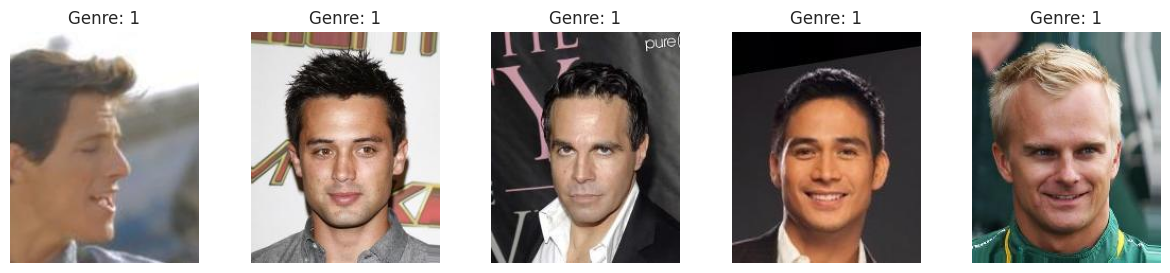

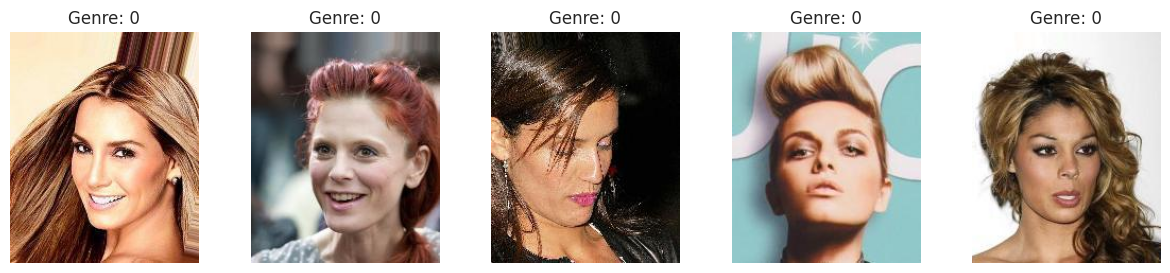

In [ ]:
#Mostramos 5 imagenes de cada clase
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Filtramos 5 imagenes por cada clase usando el dataframe
images_genre_1 = df[df['Genero'] == 1].head(5).index.tolist()
images_genre_0 = df[df['Genero'] == 0].head(5).index.tolist()

def display_images(image_files, genero):
    plt.figure(figsize=(15, 3))
    for i, image_id in enumerate(image_files):
        img_path = os.path.join('/content/img_align_celeba/img_align_celeba', image_id)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(f'Genero: {genero}')
        plt.axis('off')
    plt.show()

# Muestra imagenes genero masculino
display_images(images_genre_1, 1)

# Muestra imagenes genero femmenino
display_images(images_genre_0, 0)


In [ ]:
#Pegue y ejecute aquí el código para el punto 1b.
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

#usamos archivos adjuntos atributos y particion
attr_path = '/content/list_attr_celeba.csv'
partition_path = '/content/list_eval_partition.csv'

# cargamos atributos
df_attrs = pd.read_csv(attr_path)
df_partition = pd.read_csv(partition_path)

#Creamos dataset 3 columnas, image_id, Male, partition
df_attrs['Male'] = df_attrs['Male'].replace(-1, 0)  # Cambio -1 a 0 para femenino
df = df_attrs[['image_id', 'Male']].merge(df_partition, on='image_id')


In [ ]:
#Division del dataset usando las particiones recomendadas

train_df = df[df['partition'] == 0].sample(8000)
val_df = df[df['partition'] == 1].sample(2000)
test_df = df[df['partition'] == 2].sample(2000)


## Preprocesamiento

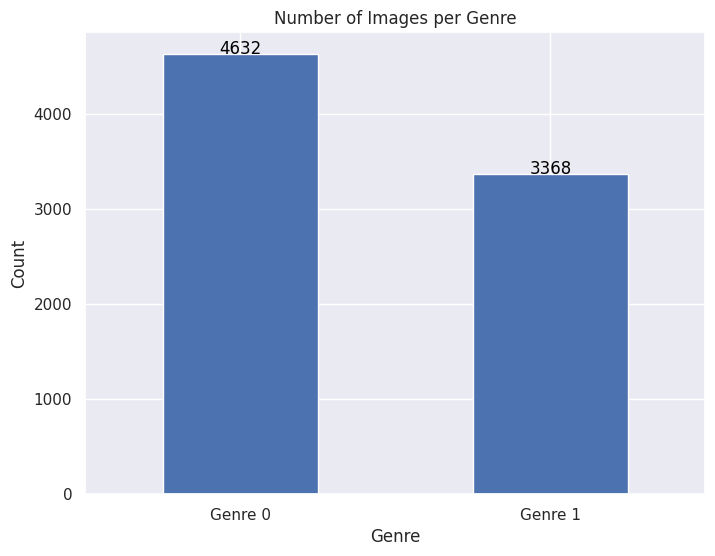

In [ ]:
#Visualizamos la distribucion de los datos para los subconjuntos
genre_counts = train_df['Male'].value_counts()

# Crear un box plot
plt.figure(figsize=(8, 6))
ax=genre_counts.plot(kind='bar')
plt.title('Number of Images per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Genre 0', 'Genre 1'], rotation=0)

for i, v in enumerate(genre_counts):
    ax.text(i, v + 0.2, str(v), color='black', ha='center') #Mostrar  el valor numerico de cada barra

plt.show()


Observamos que al crear los datasets tomando los primeros n datos que corresponden a cada particion, obteniamos datasets desbalanceados, lo cual afectara el desempeno de nuestro futuro modelo. Se decide crear una funcion para que los subconjuntos train, valid y test tengan la misma cantidad de imagenes para cada clase.

In [ ]:
# Definir el tamano de muestra para cada subconjunto
train_sample_size = 8000  # Total muestras para training
val_sample_size = 2000    # Total muestras para validation
test_sample_size = 2000   # Total muestras para testing

# Función para muestrear el mismo número de imágenes para cada género
def create_balanced_df(df, partition, sample_size):

    # Dividir el df en dos en función del genero
    df_genre_0 = df[(df['partition'] == partition) & (df['Male'] == 0)]
    df_genre_1 = df[(df['partition'] == partition) & (df['Male'] == 1)]

    # Ccalcular el # muestras para cada genero
    samples_per_genre = sample_size // 2

    # Muestra de cada dataframe, uno para 1 y otro para 0
    df_sampled_0 = df_genre_0.sample(samples_per_genre)
    df_sampled_1 = df_genre_1.sample(samples_per_genre)

    # concatenar los dos df para obtener el df final balanceado
    df_balanced = pd.concat([df_sampled_0, df_sampled_1])

    return df_balanced

# Crear DataFrames balanceados training, validation, and testing
train_df = create_balanced_df(df, 0, train_sample_size)
val_df = create_balanced_df(df, 1, val_sample_size)
test_df = create_balanced_df(df, 2, test_sample_size)

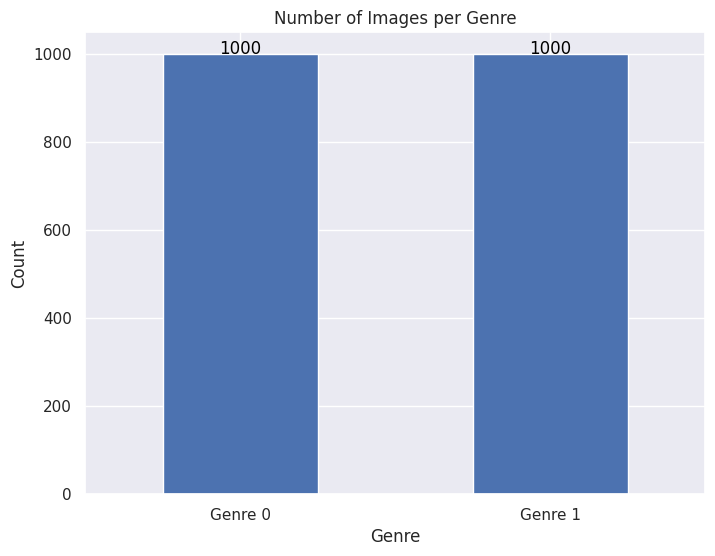

In [ ]:
#Visualizamos la distribucion de los datos para los subconjuntos
genre_counts = val_df['Male'].value_counts()

# Crear un box plot
plt.figure(figsize=(8, 6))
ax=genre_counts.plot(kind='bar')
plt.title('Number of Images per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Genre 0', 'Genre 1'], rotation=0)

for i, v in enumerate(genre_counts):
    ax.text(i, v + 0.2, str(v), color='black', ha='center') #Mostrar  el valor numerico de cada barra

plt.show()


In [ ]:
# El uso de class_mode="binary" en el generador exige que las labels sean tipo string
train_df['Male'] = train_df['Male'].astype(str)
val_df['Male'] = val_df['Male'].astype(str)
test_df['Male'] = test_df['Male'].astype(str)


In [ ]:
# Usaremmos data generators para agilizar el proceso de entrenamiento

datagen = ImageDataGenerator(rescale=1./255) #Normalizacion datos (pixeles 0-1)
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df, #Fuente
    directory='/content/img_align_celeba/img_align_celeba',
    x_col='image_id', # Imagenes
    y_col='Male', #labels
    class_mode='binary', #Realizareos clasificacionbinaria
    target_size=(224, 224),  # Tamano para VGG16
    batch_size=32  #32 imagenes por batch
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/content/img_align_celeba/img_align_celeba',
    x_col='image_id',
    y_col='Male',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/img_align_celeba/img_align_celeba',
    x_col='image_id',
    y_col='Male',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)


Found 8000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


# Punto 2

<font color='red'>Punto 2 (1.0). Cree y entrene un modelo para clasificación usando como base la arquitectura VGG16. No use ningun tipo de regularización.

(0.5) Utilice los conocimientos adquiridos para entrenar y validar su modelo. Usted deberá hacer uso de: Gráficas de Accuracy / Loss, MaAtriz de confusión y reporte de clasificación (F1-Score, Recall, Precision)

(0.5) Analice los resultados obtenidos con las diferentes herramientas, dando una explicación que incluya las difernetes métricas y que sean consecuentes con los reultados obtenidos.

In [ ]:
#(0.5)Pegue y ejecute aquí su código para el punto 2.1
#Red neuronal VGG16

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fifth Convolutional Block
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_85 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_87 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                  

In [ ]:
from keras.optimizers import Adam
 #compilacion
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
epochs = 10
steps_per_epoch = train_generator.samples // train_generator.batch_size  #Definimos pasos por epoca -250
validation_steps = val_generator.samples // val_generator.batch_size #Pasos validacion -62

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=validation_steps
)


Epoch 1/10
250/250 [==============================] - 136s 450ms/step - loss: 0.5651 - accuracy: 0.7088 - val_loss: 0.4802 - val_accuracy: 0.7717
Epoch 2/10
250/250 [==============================] - 113s 450ms/step - loss: 0.3699 - accuracy: 0.8357 - val_loss: 0.2605 - val_accuracy: 0.8997
Epoch 3/10
250/250 [==============================] - 116s 462ms/step - loss: 0.2115 - accuracy: 0.9109 - val_loss: 0.1775 - val_accuracy: 0.9309
Epoch 4/10
250/250 [==============================] - 113s 450ms/step - loss: 0.1617 - accuracy: 0.9370 - val_loss: 0.1236 - val_accuracy: 0.9567
Epoch 5/10
250/250 [==============================] - 115s 461ms/step - loss: 0.1385 - accuracy: 0.9466 - val_loss: 0.1308 - val_accuracy: 0.9461
Epoch 6/10
250/250 [==============================] - 113s 451ms/step - loss: 0.1148 - accuracy: 0.9538 - val_loss: 0.1188 - val_accuracy: 0.9506
Epoch 7/10
250/250 [==============================] - 115s 461ms/step - loss: 0.0981 - accuracy: 0.9613 - val_loss: 0.1112 -

In [ ]:
model.save('/content/vgg16_gender_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_steps = test_generator.samples // test_generator.batch_size
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

62/62 [==============================] - 8s 122ms/step - loss: 0.1996 - accuracy: 0.9410
Test Loss: 0.19955739378929138, Test Accuracy: 0.9410282373428345


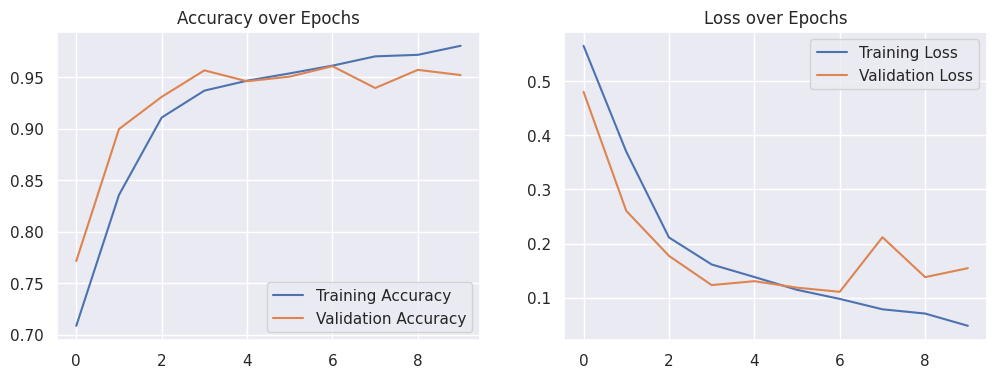

In [ ]:
#Graficar accuracy y loss versus epocas
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


1/1 [==============================] - 0s 37ms/step


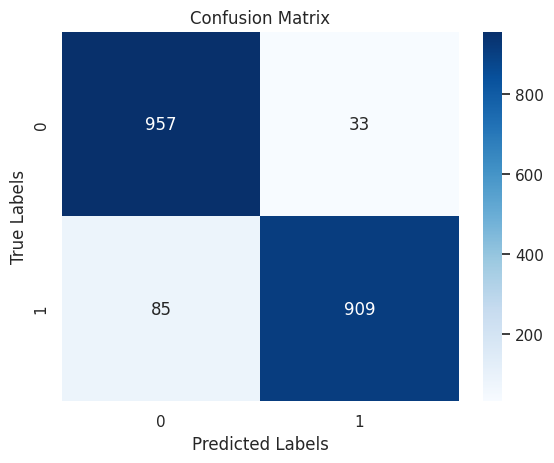

              precision    recall  f1-score   support

      Female       0.92      0.97      0.94       990
        Male       0.96      0.91      0.94       994

    accuracy                           0.94      1984
   macro avg       0.94      0.94      0.94      1984
weighted avg       0.94      0.94      0.94      1984



In [ ]:
test_generator.reset()  # Reiniciar generador
predictions = []
true_labels = []

for _ in range(test_steps):
    x_test, y_test = next(test_generator)                     #Extraer batch del generador
    predictions.extend(model.predict(x_test).flatten())       #predecir y covertir a array 1D predictions
    true_labels.extend(y_test)                                #Valores reales guardados en la lista true_labels

# Convertir predicciones a etiqueta binaria, ya que se uso sigmoid
predictions = np.where(np.array(predictions) > 0.5, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_labels, predictions, target_names=['Female', 'Male'])
print(report)


Analice los resultados obtenidos con las diferentes herramientas, dando una explicación que incluya las difernetes métricas y que sean consecuentes con los reultados obtenidos.

La precisión global del modelo es de 0,93, lo que concuerda con los altos valores observados en la diagonal de la matriz de confusión (verdaderos positivos). La macromedia y la media ponderada de la precisión, la recuperación y la puntuación f1 son todas de 0,94, lo que indica un rendimiento global muy bueno.

Los resultados muestran que el modelo funciona bien en este conjunto de datos, con un ligero sesgo hacia la predicción más precisa de las mujeres que de los hombres. Esto podría deberse a varios factores. Anteriormente, cuando se estaban realizando pruebas este comportamiento se debia al desbalance del dataset.

Estos resultados son coherentes con los gráficos de entrenamiento que mostraban un buen progreso del aprendizaje a lo largo de las épocas. El ligero descenso de la precisión de validación y el aumento de la pérdida de validación cerca del final del entrenamiento podrían sugerir un overfitting, que no parece haber afectado gravemente al rendimiento del modelo en el conjunto de pruebas, como demuestran la alta precisión y las puntuaciones f1, pero que aun puede mejorarse.

# Punto 3

<font color='red'>Punto 3 (1.25). Usando métodos de regularización para mejorar el "***performance***" de su  modelo base.

(0.5) Usted podrá combinar diferentes modos de regularización con el fin de obtener 1 modelo (**modelo regularizado**) que supere los resultados del modelo base y que cumpla con el alcance general respecto a accuracy y loss de la validación.
<font color='red'> [Nota: Una vez entrenado no olvide mostrar graficos de Acurracy y Loss que corroboren la eliminación del overfitting, asi como Matrix de confusión y reporte de clasificación]

(0.5) Haciendo uso de transfer learning entrene un segundo modelo. <font color='red'> [Nota: Una vez entrenado no olvide mostrar graficos de Acurracy y Loss que corroboren la eliminación del overfitting, asi como Matrix de confusión y reporte de clasificación]

(0.25) Realice un análisis comparativo de los resultados obtenidos con el modelo regularizado y el modelo 2.

In [ ]:
#(0.5)Pegue y ejecute aquí su código para el punto 3.1
from keras.layers import Dropout
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_r = Sequential()

# First Convolutional Block
model_r.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model_r.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_r.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Second Convolutional Block
model_r.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_r.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_r.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Third Convolutional Block
model_r.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_r.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_r.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_r.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fourth Convolutional Block
model_r.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_r.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_r.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_r.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fifth Convolutional Block
model_r.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_r.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_r.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_r.add(MaxPooling2D((2, 2), strides=(2, 2)))
# Flatten and Fully Connected Layers
model_r.add(Flatten())

#model_r.add(Dropout(0.5))

model_r.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
model_r.add(Dropout(0.1))  # Dropout
model_r.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
model_r.add(Dropout(0.3))  # Aumentando dropout para la segunda capa densa

# Output Layer
model_r.add(Dense(1, activation='sigmoid'))


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#checkpoint para guardar mejores pesos
checkpoint = ModelCheckpoint(
    'vgg16_best_weights3.h5',  # The path where to save the model
    monitor='val_loss',       # Metrica
    verbose=1,
    save_best_only=True,      # Solo guarda si `val_loss` mejora
    save_weights_only=True,   # Solo pesos
    mode='min',               # Minimizar
    save_freq='epoch'         # Comprobar metrica cada epoca
)

#Early stopping que parara training si val_loss no mejora luego de 2 epocas
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min', restore_best_weights=True)

model_r.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 8
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history2 = model_r.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping,checkpoint]
)


Epoch 1/8
250/250 [==============================] - ETA: 0s - loss: 3.3829 - accuracy: 0.6616
Epoch 1: val_loss improved from inf to 0.89389, saving model to vgg16_best_weights3.h5
250/250 [==============================] - 147s 572ms/step - loss: 3.3829 - accuracy: 0.6616 - val_loss: 0.8939 - val_accuracy: 0.7666
Epoch 2/8
250/250 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.7829
Epoch 2: val_loss improved from 0.89389 to 0.42718, saving model to vgg16_best_weights3.h5
250/250 [==============================] - 138s 552ms/step - loss: 0.6621 - accuracy: 0.7829 - val_loss: 0.4272 - val_accuracy: 0.8488
Epoch 3/8
250/250 [==============================] - ETA: 0s - loss: 0.3193 - accuracy: 0.8966
Epoch 3: val_loss improved from 0.42718 to 0.19147, saving model to vgg16_best_weights3.h5
250/250 [==============================] - 151s 605ms/step - loss: 0.3193 - accuracy: 0.8966 - val_loss: 0.1915 - val_accuracy: 0.9456
Epoch 4/8
250/250 [======================

In [ ]:
model.save('/content/regularized_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Modelo regularizado requerido

Se guardaron los pesos del modelo que cumple con los requerimientos, por lo tanto se cargaran para visulizar la matriz de confusion y el reporte de clasificacion. Los resultados y graficos del entrenamiento general que se llevo a cabo para la obtencion de estos pesos se consigna mas adelante.

In [ ]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Cargar los mejores pesos durante el entrenamiento
model_r.load_weights('vgg16_best_weights3.h5')

# Compilar el modelo que cumple con los requerimientos
model_r.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



1/1 [==============================] - 0s 47ms/step


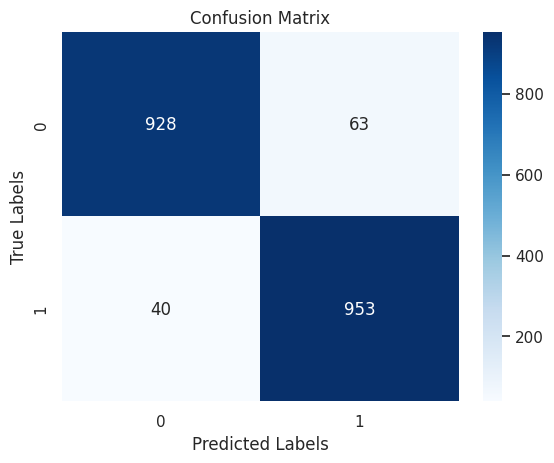

              precision    recall  f1-score   support

      Female       0.96      0.94      0.95       991
        Male       0.94      0.96      0.95       993

    accuracy                           0.95      1984
   macro avg       0.95      0.95      0.95      1984
weighted avg       0.95      0.95      0.95      1984



In [ ]:
test_generator.reset()  # Reiniciar generador
predictions = []
true_labels = []

for _ in range(test_steps):
    x_test, y_test = next(test_generator) #Extraer batch del generador
    predictions.extend(model_r.predict(x_test).flatten()) #predecir y covertir a array 1D predictions
    true_labels.extend(y_test) #Valores reales guardados en la lista true_labels

# Convertir predicciones a etiqueta binaria, ya que se uso sigmoid
predictions = np.where(np.array(predictions) > 0.5, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_labels, predictions, target_names=['Female', 'Male'])
print(report)


## Resultados del entrenamiento del modelo regularizado

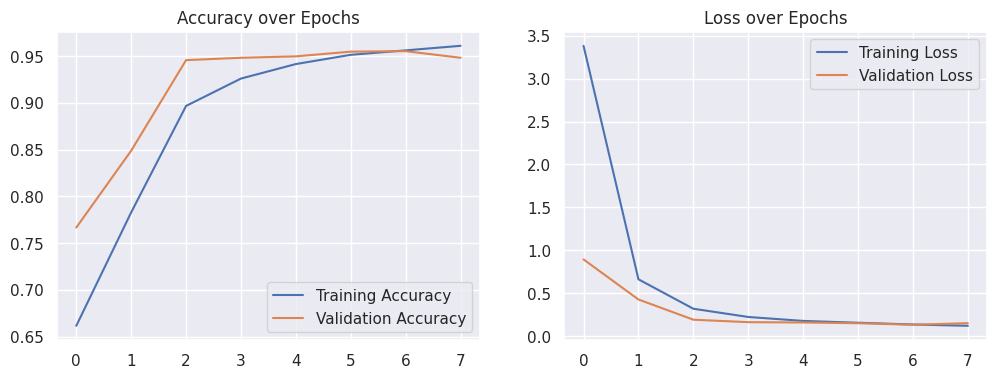

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


1/1 [==============================] - 0s 97ms/step


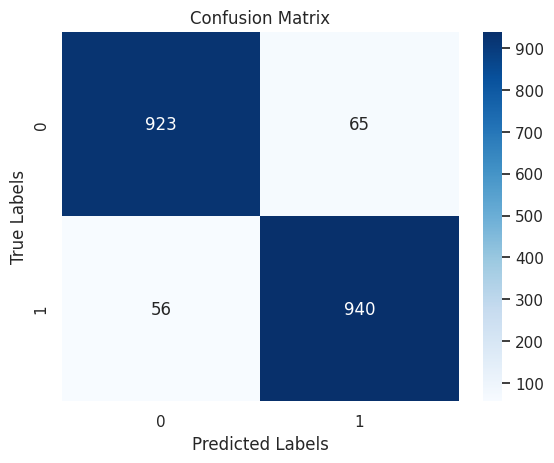

              precision    recall  f1-score   support

      Female       0.94      0.93      0.94       988
        Male       0.94      0.94      0.94       996

    accuracy                           0.94      1984
   macro avg       0.94      0.94      0.94      1984
weighted avg       0.94      0.94      0.94      1984



In [ ]:
test_generator.reset()  # Reiniciar generador
predictions = []
true_labels = []

for _ in range(test_steps):
    x_test, y_test = next(test_generator)                    #Extraer batch del generador
    predictions.extend(model_r.predict(x_test).flatten())    #predecir y covertir a array 1D predictions
    true_labels.extend(y_test)                               #Valores reales guardados en la lista true_labels


# Convertir predicciones a etiqueta binaria, ya que se uso sigmoid
predictions = np.where(np.array(predictions) > 0.5, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_labels, predictions, target_names=['Female', 'Male'])
print(report)


## Modelo transfer learning

In [ ]:
#(0.5)Pegue y ejecute aquí su código para el punto 3.2

from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Cargar el modelo VGG16 sin las capas densas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Agregar capas personalizadas para la clasificación binaria
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combinar el modelo base de VGG16 con las capas personalizadas
model_pre = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model_pre.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 8
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history_pre = model_pre.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data= val_generator,
    validation_steps=validation_steps,
    #callbacks=[early_stopping,checkpoint]
    )

Epoch 1/8
250/250 [==============================] - 45s 170ms/step - loss: 0.5852 - accuracy: 0.8159 - val_loss: 0.3780 - val_accuracy: 0.8921
Epoch 2/8
250/250 [==============================] - 40s 160ms/step - loss: 0.3953 - accuracy: 0.8809 - val_loss: 0.3345 - val_accuracy: 0.9002
Epoch 3/8
250/250 [==============================] - 41s 165ms/step - loss: 0.3577 - accuracy: 0.8888 - val_loss: 0.3170 - val_accuracy: 0.9042
Epoch 4/8
250/250 [==============================] - 42s 170ms/step - loss: 0.3463 - accuracy: 0.8900 - val_loss: 0.2972 - val_accuracy: 0.9088
Epoch 5/8
250/250 [==============================] - 40s 159ms/step - loss: 0.3227 - accuracy: 0.8947 - val_loss: 0.2875 - val_accuracy: 0.9128
Epoch 6/8
250/250 [==============================] - 43s 170ms/step - loss: 0.3066 - accuracy: 0.8986 - val_loss: 0.2713 - val_accuracy: 0.9143
Epoch 7/8
250/250 [==============================] - 43s 170ms/step - loss: 0.3019 - accuracy: 0.9020 - val_loss: 0.2823 - val_accuracy:

In [ ]:
model_pre.save('/content/model_pre.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


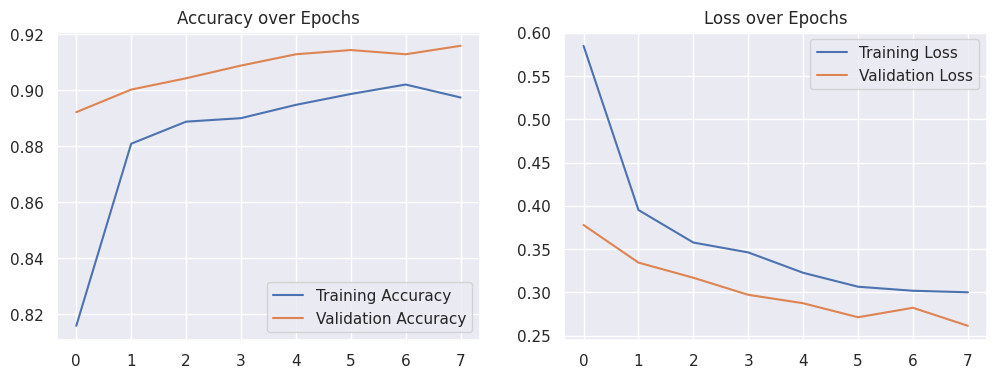

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_pre.history['accuracy'], label='Training Accuracy')
plt.plot(history_pre.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_pre.history['loss'], label='Training Loss')
plt.plot(history_pre.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

1/1 [==============================] - 0s 26ms/step


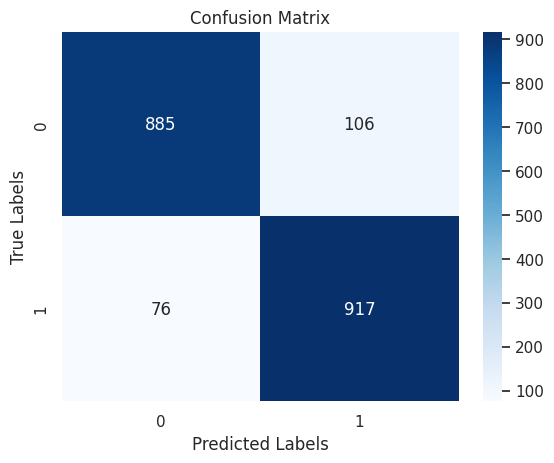

              precision    recall  f1-score   support

      Female       0.92      0.89      0.91       991
        Male       0.90      0.92      0.91       993

    accuracy                           0.91      1984
   macro avg       0.91      0.91      0.91      1984
weighted avg       0.91      0.91      0.91      1984



In [ ]:
test_generator.reset()  # Reiniciar generador
predictions = []
true_labels = []

for _ in range(test_steps):
    x_test, y_test = next(test_generator)                     #Extraer batch del generador
    predictions.extend(model_pre.predict(x_test).flatten())   #predecir y covertir a array 1D predictions
    true_labels.extend(y_test)                                #Valores reales guardados en la lista true_labels

# Convertir predicciones a etiqueta binaria, ya que se uso sigmoid
predictions = np.where(np.array(predictions) > 0.5, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_labels, predictions, target_names=['Female', 'Male'])
print(report)

**Comparacion Modelo regularizado y modelo 2**

Rendimiento de Clasificación: Ambos modelos muestran un alto rendimiento, pero el modelo regularizado tiene una ligera ventaja en términos de precisión y puntuaciones F1.

Generalización: Se colocaron los mismos valores de Dropout y regularizacion L2 del Modelo regularizado al  Modelo 2. Esto provoco una mejora considerable en la generalización en comparación con versiones anteriores, con la precisión de validación siguiendo de cerca a la precisión de entrenamiento.

Sobreajuste: No parece haber sobreajuste en el Modelo 2 , similar al modelo regularizado, basado en las gráficas de pérdida.

Equilibrio de Clases: Ambos modelos clasifican bien ambas clases, pero nuevamente, el modelo regularizado es ligeramente superior.

El Modelo 2 mejoró significativamente después de los ajustes, acercándose al rendimiento del modelo regularizado. Aunque el modelo regularizado sigue siendo ligeramente superior, la brecha se ha reducido y el Modelo 2 ahora parece ser una alternativa viable con buena generalización y equilibrio de clases. Esto demuestra que ajustar los parámetros y técnicas de regularización puede tener un impacto significativo en el rendimiento del modelo.

En conclusión, el modelo regularizado tiene un rendimiento general superior en este caso particular, mostrando un mejor equilibrio y una capacidad más sólida para generalizar a partir de los datos de validación. Esto podría deberse a la naturaleza balanceada del conjunto de datos de entrenamiento y a una arquitectura más afinada para la tarea específica de clasificación de género en imágenes.

# Punto 4

<font color='red'>Punto 4 (1.0). Comprendiendo mejor su Clasificador (Modelo con regularización)</font>.

A partir de la lectura juiciosa de este enlace: [VISUALIZING FEATURE MAPS](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/).

Realice una comparación visual de las diferentes capas convolucionales (entendiendo que estas, son las que producen los diferentes feature maps).<font color='red'>[Nota: Para esta parte, utilice el conjunto de datos de TEST]</font>.

Acompañe esta comparación visual con un párrafo donde muestre su análisis al respecto.


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.models import Model
from matplotlib import pyplot

In [ ]:
# Lista de índices de capas intermedias que deseas seleccionar como salidas del nuevo modelo.
ixs = [1, 3, 6, 9, 12]

# Crea una lista de salidas correspondientes a las capas intermedias seleccionadas.
outputs = [model_r.layers[i+1].output for i in ixs]

# Crea un nuevo modelo que toma las mismas entradas que el modelo original, pero produce las salidas seleccionadas.
modelo_2r = Model(inputs=model_r.inputs, outputs=outputs)


In [ ]:
# Itera a través de las capas del modelo `modelo_test2`.
for i in range(len(modelo_2r.layers)):
    layer = modelo_2r.layers[i]

    # Verifica si la capa es una capa convolucional (contiene 'conv' en su nombre).
    if 'conv' not in layer.name:
        continue

    # Imprime el índice de la capa, su nombre y la forma de su salida si es una capa convolucional.
    print(i, layer.name, layer.output.shape)

0 conv2d_52_input (None, 224, 224, 3)
1 conv2d_52 (None, 224, 224, 64)
2 conv2d_53 (None, 224, 224, 64)
4 conv2d_54 (None, 112, 112, 128)
5 conv2d_55 (None, 112, 112, 128)
7 conv2d_56 (None, 56, 56, 256)
8 conv2d_57 (None, 56, 56, 256)
9 conv2d_58 (None, 56, 56, 256)
11 conv2d_59 (None, 28, 28, 512)
12 conv2d_60 (None, 28, 28, 512)
13 conv2d_61 (None, 28, 28, 512)


1/1 [==============================] - 1s 677ms/step


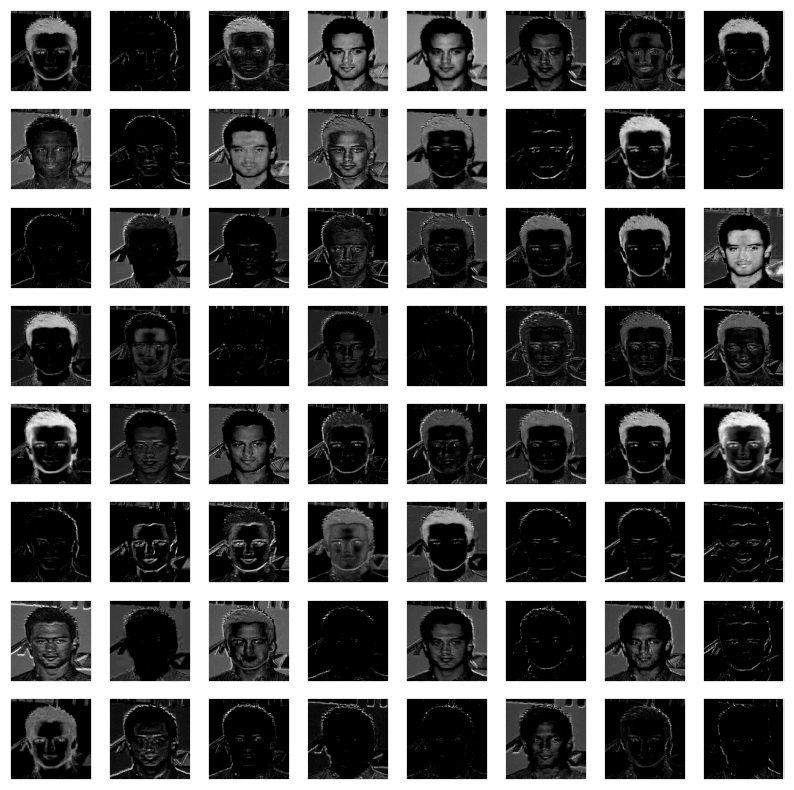

--------------------------------------------


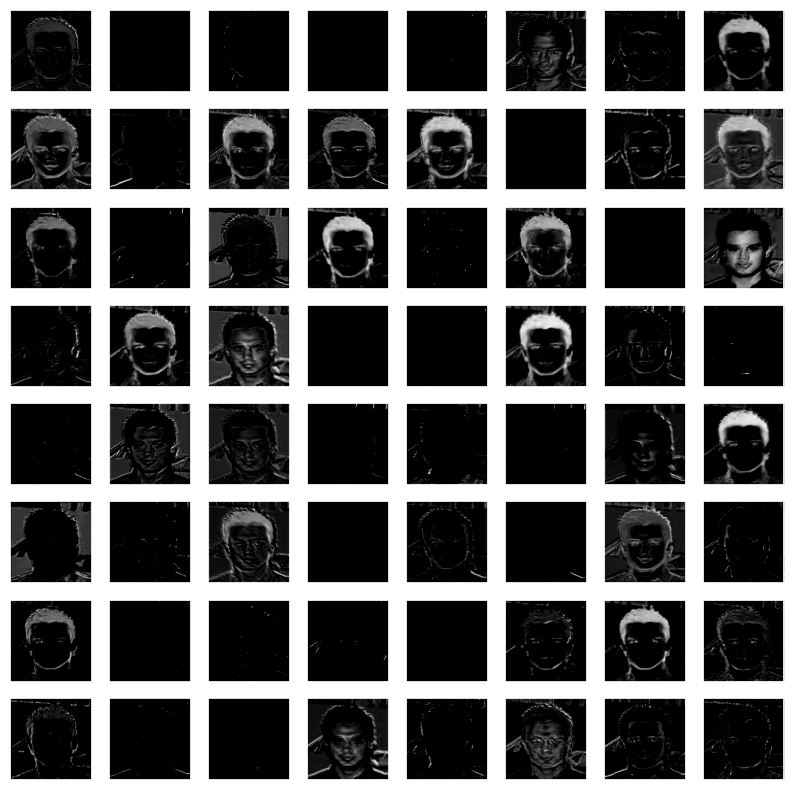

--------------------------------------------


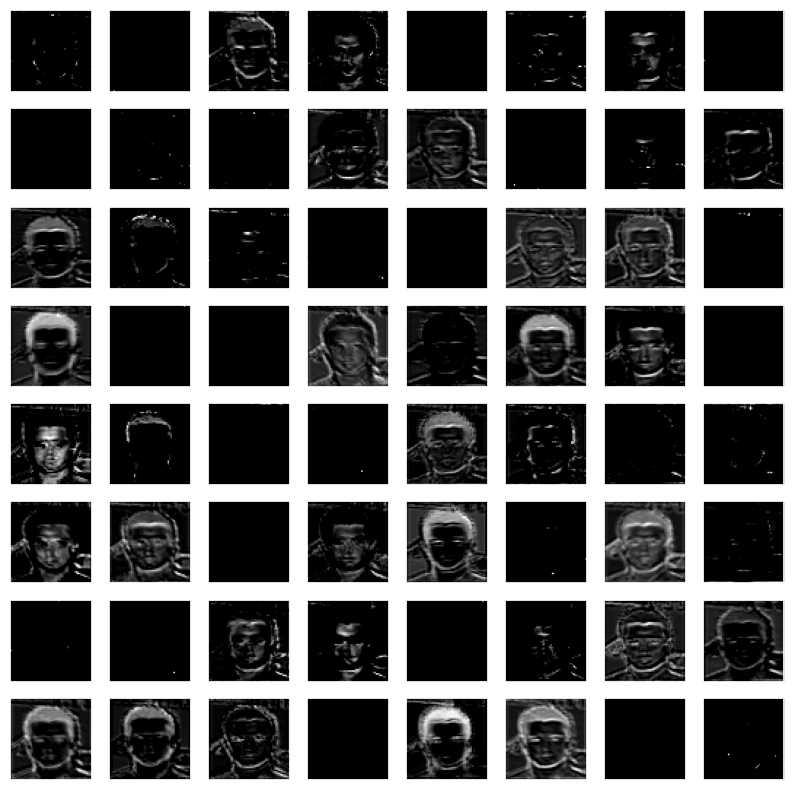

--------------------------------------------


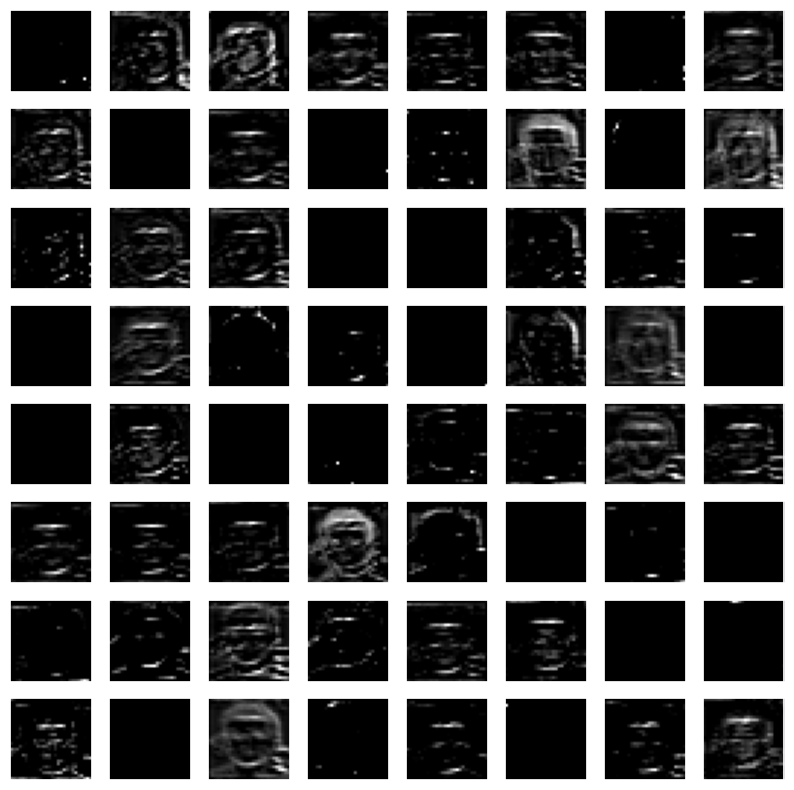

--------------------------------------------


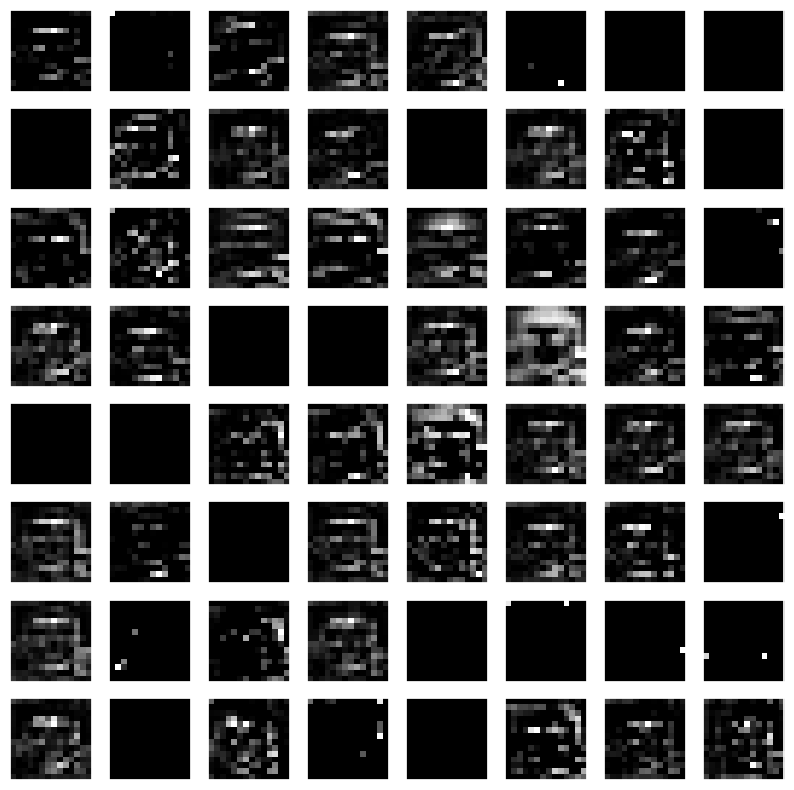

--------------------------------------------


In [ ]:
# Establece el tamaño predeterminado de las figuras.
plt.rcParams["figure.figsize"] = (10, 10)

# Carga una imagen y la redimensiona a 224x224 píxeles.
img = load_img('/content/img_align_celeba/img_align_celeba/000007.jpg', target_size=(224, 224))

# Convierte la imagen a un arreglo.
img = img_to_array(img)

# Expande las dimensiones para que representen una sola 'muestra'.
img = expand_dims(img, axis=0)

# Prepara la imagen (por ejemplo, escala los valores de píxeles para el modelo VGG).
img = preprocess_input(img)

# Obtiene mapas de características para la primera capa oculta.
feature_maps = modelo_2r.predict(img)

# Tamaño de la cuadrícula para mostrar las activaciones.
square = 8

# Itera a través de los mapas de características y los muestra en una cuadrícula.
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # Especifica el subplot y desactiva los ejes.
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # Muestra el canal del filtro en escala de grises.
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1

    # Muestra la figura.
    pyplot.show()
    print("--------------------------------------------")

 Cada imagen de cada uno de los mapas de caracteristicas corresponde a un filtro diferente aplicado a la entrada original. Estos filtros están diseñados para detectar diversas características en las imágenes de entrada, como bordes, esquinas o texturas.

En el contexto de la explicabilidad y de acuerdo a la informacion investigada


*   Algunos mapas son de alto contraste y destacan los bordes y los detalles finos, lo que significa que esos filtros en concreto son detectores de bordes.

*   Otros mapas muestran cambios de intensidad menos localizados, lo que indica que estos filtros captan texturas o patrones.

*   La diversidad en la apariencia de los mapas de características sugiere que cada filtro ha aprendido a detectar una característica única.

Analizando estos mapas de características, se puede deducir qué características son las más significativas para las primeras capas de la red. Por ejemplo, viendo el primer mapa podria decirse que el cabello puede ser un factor determinate a la hora de clasificar el genero. Es muy importante utilizar este metodo, ya que permite comprender el "razonamiento" que subyace a las capas posteriores de la red y, en última instancia, a sus predicciones. Comprender estos patrones también puede servir para modificar la arquitectura o los parámetros de la red con el fin de mejorar su rendimiento o corregir sesgos.

# Punto 5

<font color='red'>Punto 5 (0.5). Validando su modelo (Mejor modelo obtenido)</font>.

Obtenga de internet 5 fotos grupales donde aparezcan hombres y mujeres. Tenga en cuenta que ninguna de las imagenes por usted seleccionadas contenga menos de 10 personas.

Es claro que en el momento ustedes aun no han trabajado con modelos detectores. Sin embargo, usted necesita crear un bounding box alrededor de cada rostro. Este bounding box usted lo puede crear manualmente si asi lo desea (ej:puede usrar lla función Rectangle de OpenCV y devolver la localizacion del mismo (H,W,Cx,Cy)

Genere una tabla especificando: Imagen, #BBox, #Genero real asociado al BBox,# Prediccion de genero + %

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s eta 0:00:00


In [ ]:
!unzip ImageTest2.zip

Archive:  ImageTest2.zip
   creating: ImageTest2/
  inflating: ImageTest2/test1.jpg    
  inflating: ImageTest2/test2.jpg    
  inflating: ImageTest2/test3.jpg    
  inflating: ImageTest2/test4.jpg    
  inflating: ImageTest2/test5.jpg    


In [ ]:
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import cv2
import os

# Asumiendo la ruta de la carpeta
folder_path = '/content/ImageTest2'  # Reemplaza con la ruta de tu carpeta
output_folder_path = '/content/ExtractedFaces2'  # Ruta de la carpeta donde se guardarán los rostros

if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

def draw_faces_with_mtcnn(folder_path):
    detector = MTCNN()
    images_with_bboxes = []

    # Obtener las primeras 5 imágenes
    for filename in os.listdir(folder_path)[:5]:
        if filename.lower().endswith(('.jpg', '.png')):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Detectar rostros
            faces = detector.detect_faces(image_rgb)

            # Dibujar cuadros delimitadores y extraer rostros
            for j, face in enumerate(faces):
                x, y, width, height = face['box']
                # Asegurarse de que las coordenadas no sean negativas y no excedan el tamaño de la imagen
                x1 = max(0, x - 10)
                y1 = max(0, y - 10)
                x2 = min(image.shape[1], x + width + 10)
                y2 = min(image.shape[0], y + height + 10)

                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image, str(j+1), (x1, y1-5 if y1-5 > 0 else y1+15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

                # Extraer y guardar el rostro
                face_image = image[y1:y2, x1:x2]
                face_filename = f"{os.path.splitext(filename)[0]}_face_{j+1}.png"
                cv2.imwrite(os.path.join(output_folder_path, face_filename), face_image)

            images_with_bboxes.append(image)

    return images_with_bboxes

def display_images(images):
    plt.figure(figsize=(30, 20))
    titles = ["Test 3", "Test 5", "Test 4", "Test 2", "Test 1"]

    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()





In [ ]:
images_with_bboxes = draw_faces_with_mtcnn(folder_path)

3/3 [==============================] - 0s 8ms/step


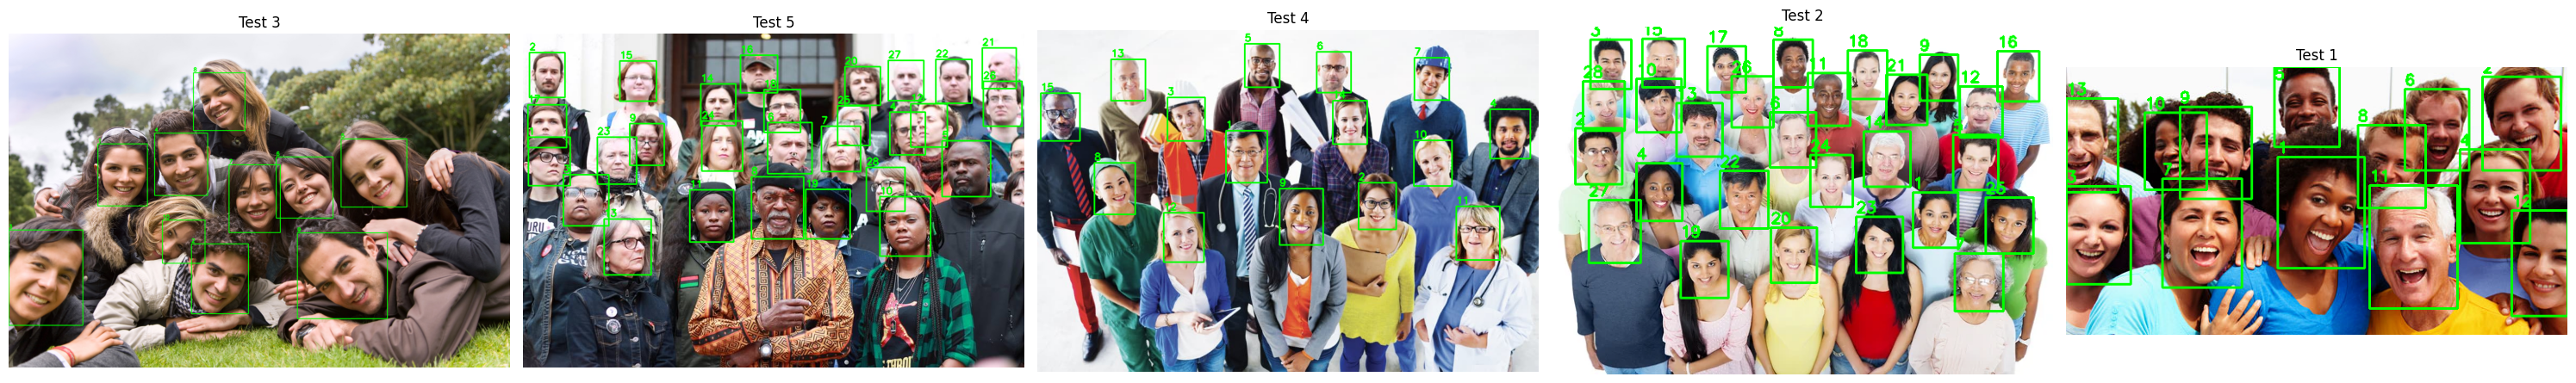

In [ ]:
display_images(images_with_bboxes)

In [ ]:
from keras.models import load_model

# Cargar los mejores pesos durante el entrenamiento
model_r.load_weights('vgg16_best_weights3.h5')

# Compilar el modelo que cumple con los requerimientos
model_r.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

1/1 [==============================] - 0s 21ms/step


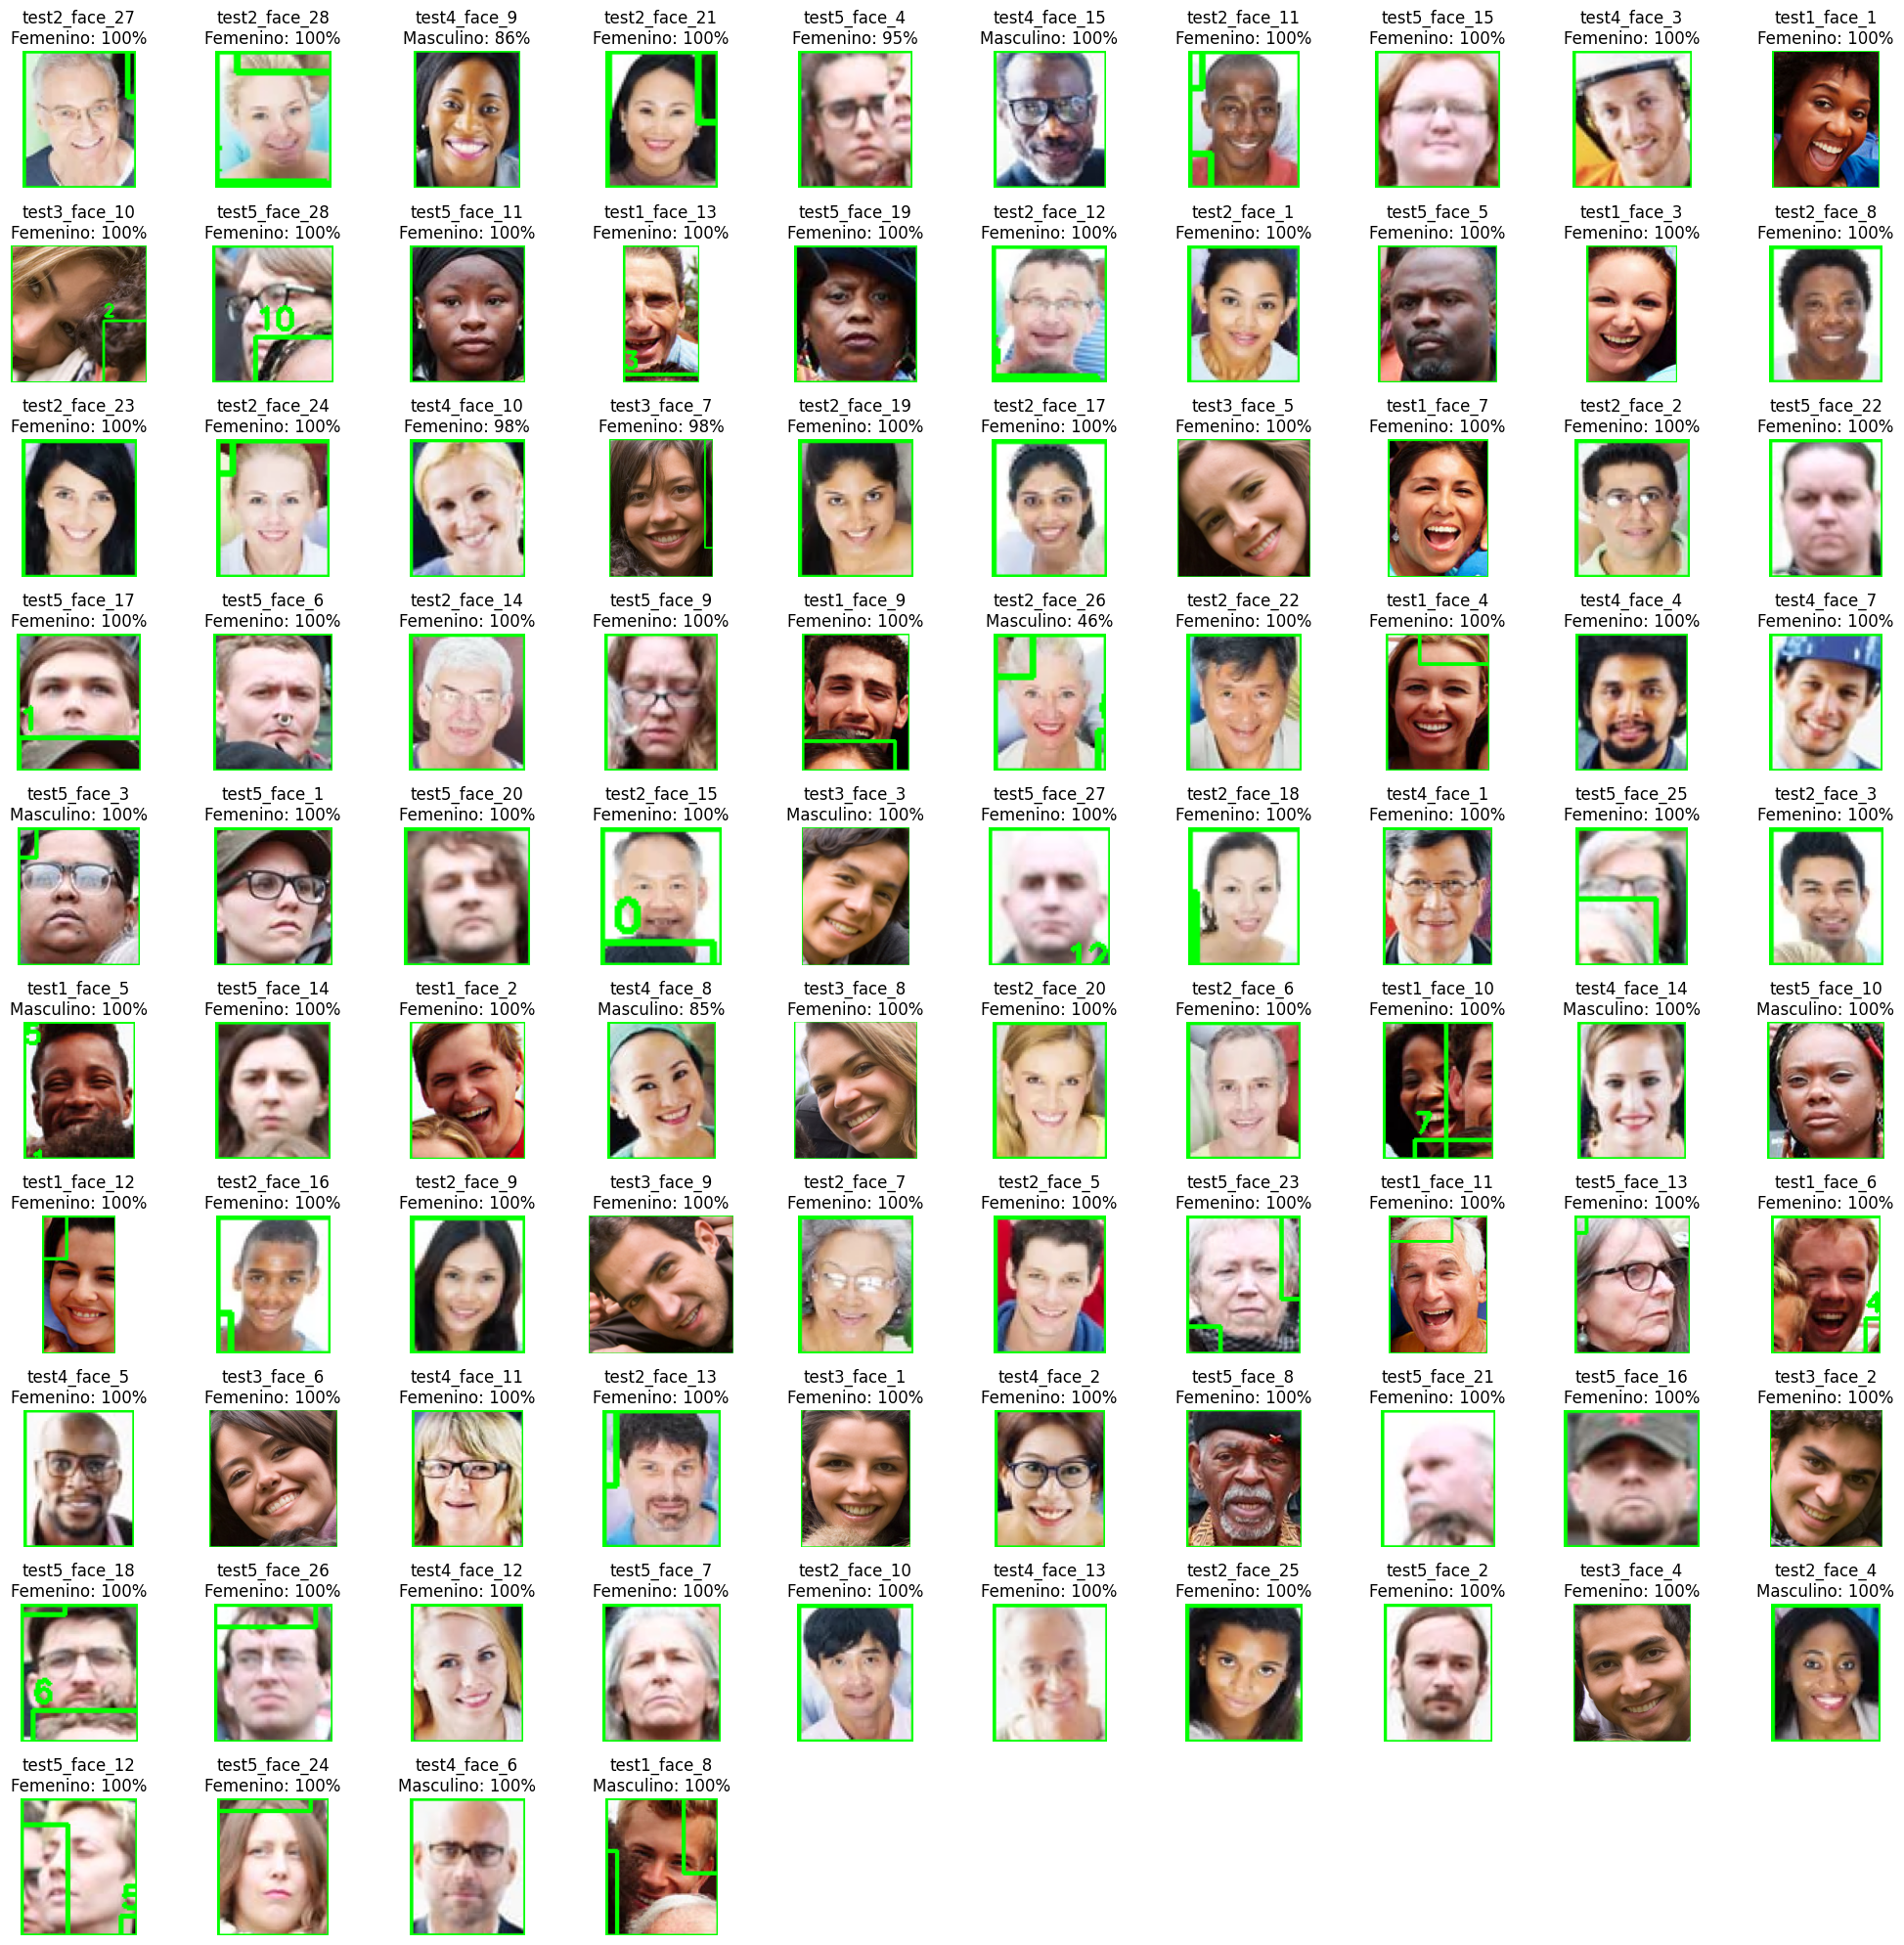

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input

# Ruta de la carpeta con las imágenes de rostros y del modelo
folder_path = '/content/ExtractedFaces2'

def preprocess_images(folder_path):
    preprocessed_images = []
    filenames = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))  # Asumiendo que VGG16 usa tamaño 224x224
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)

        preprocessed_images.append(img)
        filenames.append(filename)

    return preprocessed_images, filenames

def display_predictions(folder_path):
    images, filenames = preprocess_images(folder_path)
    plt.figure(figsize=(20, 20))
    genero=[]
    porcentaje=[]

    for i, (image, filename) in enumerate(zip(images, filenames)):
        # Realizar la predicción
        pred = model_r.predict(image)[0][0]  # Probabilidad de ser femenino
        gender = 'Femenino' if pred > 0.6 else 'Masculino'
        percentage = pred if gender == 'Femenino' else 1 - pred
        #genero.append(gender)
        #porcentaje.append(porcentaje)

        # Mostrar la imagen y la predicción
        plt.subplot(10, 10, i + 1)
        plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(folder_path, filename)), cv2.COLOR_BGR2RGB))
        filename_no_ext = os.path.splitext(filename)[0]
        plt.title(f"{filename_no_ext}\n{gender}: {100*percentage:.0f}%")
        plt.axis('off')

        if i == 99:  # Mostrar solo las primeras 100 imágenes
            break
    #return genero,porcentaje

    plt.tight_layout()
    plt.show()

display_predictions(folder_path)
